In [18]:
import sources
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style="whitegrid")

# Captura en red Ethernet hogareña

Este notebook trabaja con los .pkl que genera el script `sources.py` para cada fuente, que se guardan como `dicc<simbolo, frecuencia>`

In [100]:
# Ploteo de barras
def plot_ordered_bars(dicc):
    """
    Plotea cierta propiedad de una fuente como barras ordenadas.
    La información está guardada como dict<simbolo, numero> 
    """
    # Obtengo los simbolos en orden por los numeros 
    symbols = [x for (x,y) in sorted(dicc.items(),key=lambda x: x[1])]
    symbols = list(map(lambda x: x.replace('\n', '-'),symbols))
    vals = [y for (x,y) in sorted(dicc.items(),key=lambda x: x[1])]
    
    # debug stuff
    print(list(map(lambda x: x.replace('\n', '-'),symbols)))
    print(vals)

    # Los muestro en barras
    fig = plt.figure()
    plt.bar(range(len(symbols)), vals, align='center')
    plt.xticks(range(len(dicc)), symbols)
    fig.autofmt_xdate() # rotar símbolos del eje x

In [20]:
def setKeySeparator(dicc):
    res = dict()
    for k,v in dicc.items():
        redefinedKey = k.replace('\n','-')
        res[redefinedKey] = v
    return res

# Fuente S1

In [103]:
# Ejemplo

pickle_path = '../data/palbi_capture_eth_S1.pkl'
S1 = sources.load_source(pickle_path)

infos = sources.informacion_por_simbolo(S1)
probas = sources.proba_por_simbolo(S1)
entropy = sources.entropy(S1)

In [84]:
print(S1.items())

dict_items([('unicast\nARP', 183), ('broadcast\nIP', 49), ('broadcast\nARP', 720), ('unicast\nIP', 9496), ('unicast\nIPv6', 124)])


## Composición de la captura realizada

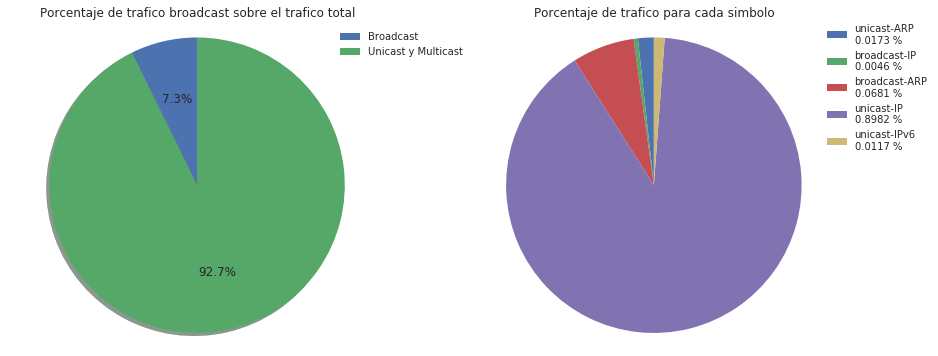

In [104]:
fig1, axarr = plt.subplots(1, 2, figsize=(15, 6))

broadcast = sum([v for k, v in S1.items() if 'broadcast' in k])
unicast = sum([v for k, v in S1.items() if 'unicast' in k])
labels = 'Broadcast', 'Unicast y Multicast'
sizes = [broadcast, unicast]
# Broadcast over unicast/multicast packets
axarr[0].pie(sizes,autopct='%1.1f%%',shadow=True, startangle=90)
axarr[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axarr[0].set_title('Porcentaje de trafico broadcast sobre el trafico total')
handles = []
axarr[0].legend(labels, bbox_to_anchor=(0.85,1), loc="upper left")
# Packets divided in layer 2 protocols
labels, sizes = map(list, zip(*S1.items()))
labels = list(map(lambda s: s.replace('\n', '-'),labels))
percents = list(map(lambda x: x/sum(sizes),sizes))
labels = [labels[i]+"\n%.4f %%"%(percents[i]) for i in range(len(sizes))]
axarr[1].pie(sizes, startangle=90)
axarr[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axarr[1].set_title('Porcentaje de trafico para cada simbolo')
axarr[1].legend(labels, bbox_to_anchor=(0.93,1.025), loc="upper left")

plt.show()

In [86]:
# create and normalize dict
dataDict = dict()
for k, v in S1.items():
    (dest,layer2) = k.split('\n')
    if layer2 not in dataDict.keys():
        dataDict[layer2] = dict()
    dataDict[layer2][dest] = v
# print(S1)
# print(dataDict)
packetsFrame = pd.DataFrame(dataDict)
print(packetsFrame["ARP"])

broadcast    720
unicast      183
Name: ARP, dtype: int64


In [87]:
# create and normalize dict
dataDict = dict()
for k, v in S1.items():
    (dest,layer2) = k.split('\n')
    if layer2 not in dataDict.keys():
        dataDict[layer2] = dict()
    dataDict[layer2][dest] = v
# print(S1)
# print(dataDict)
print(dataDict)

{'IPv6': {'unicast': 124}, 'IP': {'broadcast': 49, 'unicast': 9496}, 'ARP': {'broadcast': 720, 'unicast': 183}}


['who-has-src: 192.168.0.1', 'who-has-src: 192.168.0.112', 'who-has-src: 192.168.0.100', 'who-has-src: 192.168.0.106', 'who-has-src: 192.168.0.109', 'who-has-src: 192.168.0.110', 'who-has-src: 192.168.0.104']
[0.5378114073502556, 3.887844839917972, 3.9606011823532867, 4.118142459339766, 4.233619676759702, 4.2950202214238455, 5.818582177480858]


NameError: name 'fig' is not defined

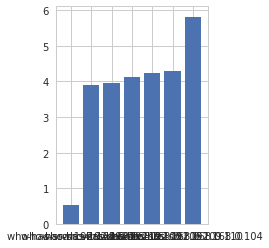

In [99]:
plt.subplot(1,2,1)
plot_ordered_bars(infos)
plt.title('Informacion de fuente S1')
plt.subplot(1,2,2)
plot_ordered_bars(probas)
plt.title('Probabilidades de la fuente S1')
plt.show()

# Fuente S2

In [90]:
# EjemploZ

pickle_path = '../data/palbi_capture_eth_S2.pkl'
S2 = sources.load_source(pickle_path)

infos = sources.informacion_por_simbolo(S2)
probas = sources.proba_por_simbolo(S2)
entropy = sources.entropy(S2)
S2 = setKeySeparator(S2)

In [91]:
print(S2)

{'who-has-src: 192.168.0.109': 48, 'who-has-src: 192.168.0.106': 52, 'who-has-src: 192.168.0.112': 61, 'who-has-src: 192.168.0.104': 16, 'who-has-src: 192.168.0.110': 46, 'who-has-src: 192.168.0.1': 622, 'who-has-src: 192.168.0.100': 58}


['who-has-src: 192.168.0.1', 'who-has-src: 192.168.0.112', 'who-has-src: 192.168.0.100', 'who-has-src: 192.168.0.106', 'who-has-src: 192.168.0.109', 'who-has-src: 192.168.0.110', 'who-has-src: 192.168.0.104']
[0.5378114073502556, 3.887844839917972, 3.9606011823532867, 4.118142459339766, 4.233619676759702, 4.2950202214238455, 5.818582177480858]


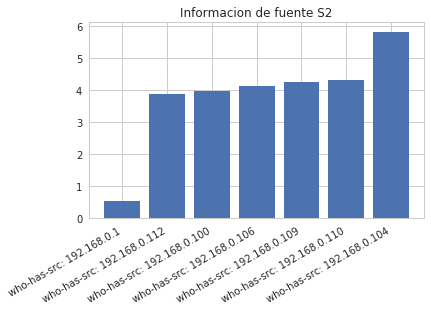

['who-has-src: 192.168.0.104', 'who-has-src: 192.168.0.110', 'who-has-src: 192.168.0.109', 'who-has-src: 192.168.0.106', 'who-has-src: 192.168.0.100', 'who-has-src: 192.168.0.112', 'who-has-src: 192.168.0.1']
[0.017718715393133997, 0.05094130675526024, 0.053156146179401995, 0.05758582502768549, 0.06423034330011074, 0.06755260243632337, 0.6888150609080842]


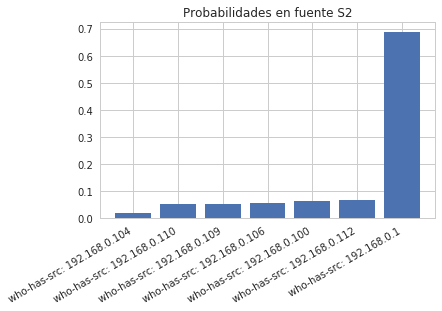

In [92]:
plot_ordered_bars(infos)
plt.title('Informacion de fuente S2')
plt.show()

plot_ordered_bars(probas)
plt.title('Probabilidades en fuente S2')
plt.show()

Text(0.5,15,'ip_dst')

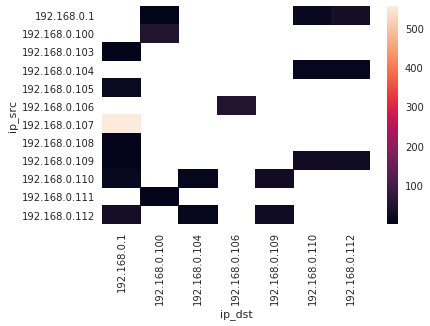

In [93]:
pickle_path = '../data/palbi_capture_eth_hmap.pkl'
hmapDict = sources.load_source(pickle_path)
hmapDF = pd.DataFrame(hmapDict)
# print(hmapDF)
sns.heatmap(hmapDF)
plt.ylabel("ip_src")
plt.xlabel("ip_dst")